# Read me

If you want to start with pre-filtered data set, start with import section and then skip everything until "3. Starting point". Start from there

# 0. Import section

In [170]:
!pip3 download nltk
!pip3 install nltk
!pip3 download seaborn
!pip3 install seaborn
!pip3 install gensim
!pip3 install pyLDAvis
!pip3 install pyLDAvis.gensim

import pandas as pd
import math
import time
import os
import numpy as np
import matplotlib as plt
import seaborn as sns 
import nltk
import gensim 
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim import corpora, models
from pprint import pprint


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

  File was already downloaded /Users/Felix/Desktop/nltk-3.8.1-py3-none-any.whl
  File was already downloaded /Users/Felix/Desktop/regex-2023.5.5-cp310-cp310-macosx_10_9_x86_64.whl
  File was already downloaded /Users/Felix/Desktop/joblib-1.2.0-py3-none-any.whl
  File was already downloaded /Users/Felix/Desktop/tqdm-4.65.0-py3-none-any.whl
  File was already downloaded /Users/Felix/Desktop/click-8.1.3-py3-none-any.whl
Successfully downloaded nltk regex click joblib tqdm

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
  File was already downloaded /Users/Felix/Desktop/seaborn-0.12.2-py3-none-any.whl
  File was already downloaded /Users/Felix/Desktop/numpy-1.24.3-cp310-cp310-macosx_10_9_x86_64.whl
  File was already downloaded /Users/Felix/Desktop/matplotlib-3.7.1-cp310-cp310-macosx_10_12_x86

[nltk_data] Downloading package stopwords to /Users/Felix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Felix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Felix/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Cleaning big data set

In [3]:
newspaper_df = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newspaper_data.csv')
newspaper_df.head()

KeyboardInterrupt: 

In [ ]:
#give me the shape of newspaper_df
newspaper_df.shape

(2688878, 10)

In [ ]:
#give me the different potential values for the column publication
print(newspaper_df['publication'].unique())
len(newspaper_df['publication'].unique())

['Vox' 'Business Insider' 'Reuters' 'TMZ' 'Vice' 'Vice News'
 'Hyperallergic' 'TechCrunch' 'Axios' 'Refinery 29' 'The Verge' 'Mashable'
 'People' 'Economist' 'CNN' 'Gizmodo' 'New Yorker' 'CNBC' 'Wired'
 'New Republic' 'Fox News' 'The Hill' 'Politico' 'The New York Times'
 'Buzzfeed News' 'Washington Post' nan]


27

In [ ]:
#show me the distribution of the column over gteh different values for publication
newspaper_df['publication'].value_counts()

Reuters               840094
The New York Times    252259
CNBC                  238096
The Hill              208411
People                136488
CNN                   127602
Refinery 29           111433
Vice                  101137
Mashable               94107
Business Insider       57953
The Verge              52424
TechCrunch             52095
TMZ                    49595
Axios                  47815
Vox                    47272
Politico               46377
Washington Post        40882
Buzzfeed News          32819
Gizmodo                27228
Economist              26227
Wired                  20243
Fox News               20144
Vice News              15539
Hyperallergic          13551
New Republic           11809
New Yorker              4701
Name: publication, dtype: int64

In [ ]:
relevant = ['TMZ', 'Economist', 'CNN', 'CNBC', 'Fox News', 'Reuters', 'The New York Times','Washington Post', 'Business Insider']

In [ ]:
columns_to_keep = ['year', 'title', 'article', 'publication']

In [ ]:
#create new data frame that is reduced to the relevant publications and columns to keep
newspaper_df = newspaper_df[newspaper_df['publication'].isin(relevant)][columns_to_keep]

# 2. EDA of cleaned data set

## 2.1 General information

In [30]:
run = 0

In [32]:
print('Done with run {run}')

Done with run {run}


In [ ]:
newspaper_df.head()

,year,title,article,publication
1,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
2,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
3,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
4,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
5,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [ ]:
newspaper_df.shape

(1652852, 4)

In [ ]:
newspaper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652852 entries, 1 to 2688877
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1652852 non-null  int64 
 1   title        1652816 non-null  object
 2   article      1587777 non-null  object
 3   publication  1652852 non-null  object
dtypes: int64(1), object(3)
memory usage: 63.1+ MB


In [ ]:
newspaper_df.isnull().sum()

year               0
title             36
article        65075
publication        0
dtype: int64

In [ ]:
#show me the distribution of isnull in article over publication
newspaper_df[newspaper_df['article'].isnull()]['publication'].value_counts()

Washington Post       37550
Reuters               14958
CNBC                   3955
The New York Times     3173
Economist              3027
CNN                    2302
TMZ                      91
Business Insider         19
Name: publication, dtype: int64

In [ ]:
#delete all rows where article and title is null
newspaper_df = newspaper_df.dropna(subset=['article', 'title'])

In [ ]:
#show me the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts()


Reuters               825136
The New York Times    249072
CNBC                  234139
CNN                   125300
Business Insider       57934
TMZ                    49504
Economist              23200
Fox News               20144
Washington Post         3332
Name: publication, dtype: int64

In [ ]:
newspaper_df.shape

(1587761, 4)

## 2.2 Plots

<AxesSubplot: >

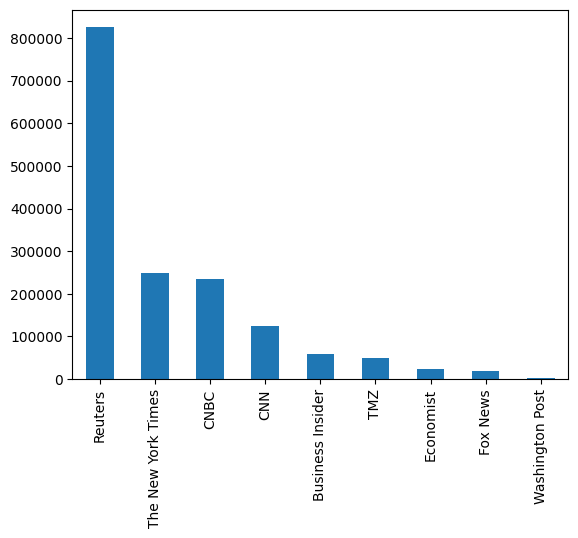

In [ ]:
#plot the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts().plot(kind='bar')

<AxesSubplot: >

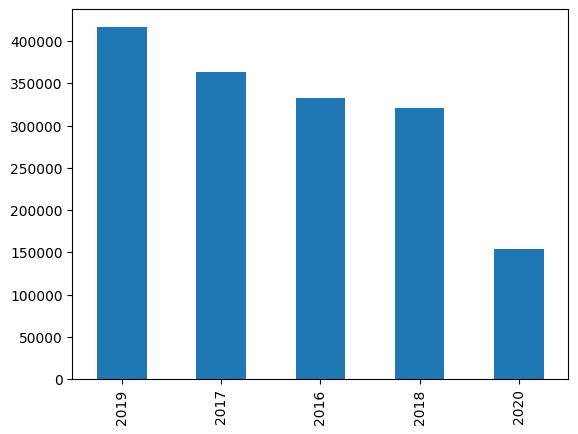

In [ ]:
#plot the articles per year
newspaper_df['year'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='year'>

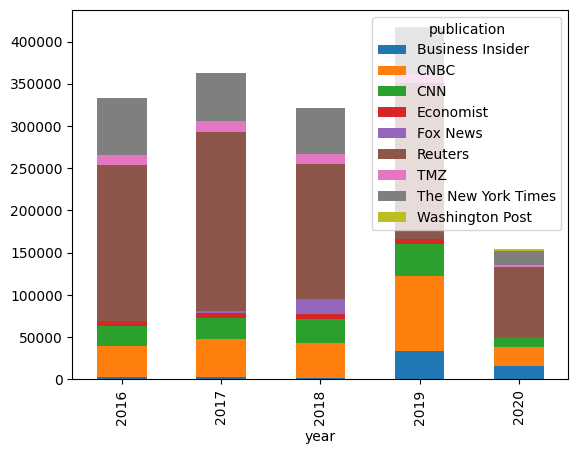

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='year'>

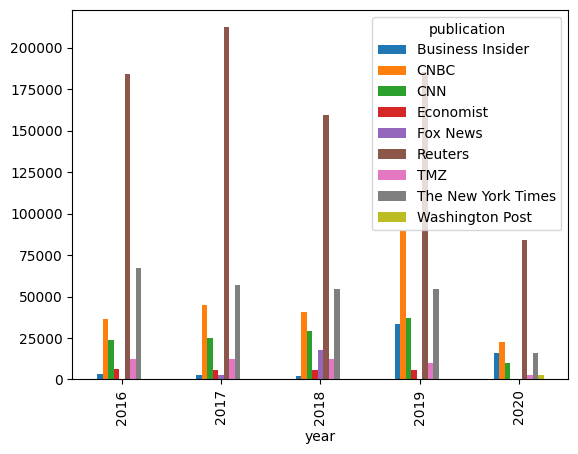

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=False)

## 2.3 Saving shorter df as csv

In [ ]:
import time
import math

In [ ]:
def split_dataframe(df, max_file_size_mb, file_name):
    # Start the timer
    start_time = time.time()

    max_file_size_bytes = max_file_size_mb * 1024 * 1024

    # Split the DataFrame into sub DataFrames
    num_files = math.ceil(len(df) / max_file_size_bytes)
    print(f'num_files: {num_files}')

    # Split the DataFrame and save each sub DataFrame as a CSV file
    sub_dfs = []
    for i in range(num_files):
        start_index = i * max_file_size_bytes
        end_index = min((i + 1) * max_file_size_bytes, len(df))
        sub_df = df.iloc[start_index:end_index]
        sub_dfs.append(sub_df)

        # Save each sub DataFrame as a CSV file with the specified name and a number
        file_path = f'{file_name}_{i + 1}.csv'
        sub_df.to_csv(file_path, index=False)

    # Stop the timer
    end_time = time.time()
    print(f'Finished splitting {len(df)} rows into {num_files} files in {end_time - start_time:.2f} seconds')

    # Return the list of sub DataFrames
    return sub_dfs

In [ ]:
def split_dataframe(df, max_file_size_mb, file_name):
    # Start the timer
    start_time = time.time()

    max_file_size_bytes = max_file_size_mb * 1024 * 1024

    # Calculate the approximate size of each row in bytes
    row_size = df.memory_usage(deep=True).sum() / len(df)

    # Calculate the number of rows that would fit within the maximum file size
    num_rows_per_file = math.floor(max_file_size_bytes / row_size)

    # Split the DataFrame into sub DataFrames
    num_files = math.ceil(len(df) / num_rows_per_file)
    print(f'num_files: {num_files}')

    # Save each sub DataFrame as a CSV file with the specified name and a number
    for i in range(num_files):
        start_index = i * num_rows_per_file
        end_index = min((i + 1) * num_rows_per_file, len(df))
        sub_df = df.iloc[start_index:end_index].copy()
        file_path = f'{file_name}_{i + 1}.csv'
        sub_df.to_csv(file_path, index=False)

    # Stop the timer
    end_time = time.time()
    print(f'Finished splitting {len(df)} rows into {num_files} files in {end_time - start_time:.2f} seconds')

In [ ]:
# Split the DataFrame into sub DataFrames with a maximum file size of 249 MB
sub_dataframes = split_dataframe(newspaper_df, 24.9, "newsdata")

num_files: 327
Finished splitting 1587761 rows into 327 files in 193.70 seconds


In [ ]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_269.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_269")


num_files: 3
Finished splitting 4858 rows into 3 files in 0.82 seconds


In [ ]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_312.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_312")

num_files: 3
Finished splitting 4858 rows into 3 files in 3.37 seconds


In [ ]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_269.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_269")

num_files: 3
Finished splitting 4858 rows into 3 files in 0.75 seconds


# 3 Starting point

## 3.1 Reading in

In [2]:
#create a list with the names of the files
file_names = ['newsdata_1.csv', 'newsdata_2.csv', 'newsdata_3.csv', 'newsdata_4.csv', 'newsdata_5.csv', 'newsdata_6.csv', 'newsdata_7.csv', 'newsdata_8.csv', 'newsdata_9.csv', 'newsdata_10.csv', 'newsdata_11.csv', 'newsdata_12.csv', 'newsdata_13.csv', 'newsdata_14.csv', 'newsdata_15.csv', 'newsdata_16.csv', 'newsdata_17.csv', 'newsdata_18.csv', 'newsdata_19.csv', 'newsdata_20.csv', 'newsdata_21.csv', 'newsdata_22.csv', 'newsdata_23.csv', 'newsdata_24.csv', 'newsdata_25.csv', 'newsdata_26.csv', 'newsdata_27.csv', 'newsdata_28.csv', 'newsdata_29.csv', 'newsdata_30.csv', 'newsdata_31.csv', 'newsdata_32.csv', 'newsdata_33.csv', 'newsdata_34.csv', 'newsdata_35.csv', 'newsdata_36.csv', 'newsdata_37.csv', 'newsdata_38.csv', 'newsdata_39.csv', 'newsdata_40.csv', 'newsdata_41.csv', 'newsdata_42.csv', 'newsdata_43.csv', 'newsdata_44.csv', 'newsdata_45.csv', 'newsdata_46.csv', 'newsdata_47.csv', 'newsdata_48.csv', 'newsdata_49.csv', 'newsdata_50.csv', 'newsdata_51.csv', 'newsdata_52.csv', 'newsdata_53.csv', 'newsdata_54.csv', 'newsdata_55.csv', 'newsdata_56.csv', 'newsdata_57.csv', 'newsdata_58.csv', 'newsdata_59.csv', 'newsdata_60.csv', 'newsdata_61.csv', 'newsdata_62.csv', 'newsdata_63.csv', 'newsdata_64.csv', 'newsdata_65.csv', 'newsdata_66.csv', 'newsdata_67.csv', 'newsdata_68.csv', 'newsdata_69.csv', 'newsdata_70.csv', 'newsdata_71.csv',
'newsdata_72.csv', 'newsdata_73.csv', 'newsdata_74.csv', 'newsdata_75.csv', 'newsdata_76.csv', 'newsdata_77.csv', 'newsdata_78.csv', 'newsdata_79.csv', 'newsdata_80.csv', 'newsdata_81.csv', 'newsdata_82.csv', 'newsdata_83.csv', 'newsdata_84.csv', 'newsdata_85.csv', 'newsdata_86.csv', 'newsdata_87.csv', 'newsdata_88.csv', 'newsdata_89.csv', 'newsdata_90.csv', 'newsdata_91.csv', 'newsdata_92.csv', 'newsdata_93.csv', 'newsdata_94.csv', 'newsdata_95.csv', 'newsdata_96.csv', 'newsdata_97.csv', 'newsdata_98.csv', 'newsdata_99.csv', 'newsdata_100.csv', 'newsdata_101.csv', 'newsdata_102.csv', 'newsdata_103.csv', 'newsdata_104.csv', 'newsdata_105.csv', 'newsdata_106.csv', 'newsdata_107.csv', 'newsdata_108.csv', 'newsdata_109.csv', 'newsdata_110.csv', 'newsdata_111.csv', 'newsdata_112.csv', 'newsdata_113.csv', 'newsdata_114.csv', 'newsdata_115.csv', 'newsdata_116.csv', 'newsdata_117.csv', 'newsdata_118.csv', 'newsdata_119.csv', 'newsdata_120.csv', 'newsdata_121.csv', 'newsdata_122.csv', 'newsdata_123.csv', 'newsdata_124.csv', 'newsdata_125.csv', 'newsdata_126.csv', 'newsdata_127.csv', 'newsdata_128.csv', 'newsdata_129.csv', 'newsdata_130.csv', 'newsdata_131.csv', 'newsdata_132.csv', 'newsdata_133.csv', 'newsdata_134.csv', 'newsdata_135.csv', 'newsdata_136.csv', 'newsdata_137.csv', 'newsdata_138.csv', 'newsdata_139.csv', 'newsdata_140.csv', 'newsdata_141.csv', 'newsdata_142.csv',
'newsdata_143.csv', 'newsdata_144.csv', 'newsdata_145.csv', 'newsdata_146.csv', 'newsdata_147.csv', 'newsdata_148.csv', 'newsdata_149.csv', 'newsdata_150.csv', 'newsdata_151.csv', 'newsdata_152.csv', 'newsdata_153.csv', 'newsdata_154.csv', 'newsdata_155.csv', 'newsdata_156.csv', 'newsdata_157.csv', 'newsdata_158.csv', 'newsdata_159.csv', 'newsdata_160.csv', 'newsdata_161.csv', 'newsdata_162.csv', 'newsdata_163.csv', 'newsdata_164.csv', 'newsdata_165.csv', 'newsdata_166.csv', 'newsdata_167.csv', 'newsdata_168.csv', 'newsdata_169.csv', 'newsdata_170.csv', 'newsdata_171.csv', 'newsdata_172.csv', 'newsdata_173.csv', 'newsdata_174.csv', 'newsdata_175.csv', 'newsdata_176.csv', 'newsdata_177.csv', 'newsdata_178.csv', 'newsdata_179.csv', 'newsdata_180.csv', 'newsdata_181.csv', 'newsdata_182.csv', 'newsdata_183.csv', 'newsdata_184.csv', 'newsdata_185.csv', 'newsdata_186.csv', 'newsdata_187.csv', 'newsdata_188.csv', 'newsdata_189.csv', 'newsdata_190.csv', 'newsdata_191.csv', 'newsdata_192.csv', 'newsdata_193.csv', 'newsdata_194.csv', 'newsdata_195.csv', 'newsdata_196.csv', 'newsdata_197.csv', 'newsdata_198.csv', 'newsdata_199.csv', 'newsdata_200.csv', 'newsdata_201.csv', 'newsdata_202.csv', 'newsdata_203.csv', 'newsdata_204.csv', 'newsdata_205.csv', 'newsdata_206.csv', 'newsdata_207.csv', 'newsdata_208.csv', 'newsdata_209.csv', 'newsdata_210.csv', 'newsdata_211.csv', 'newsdata_212.csv', 'newsdata_213.csv',
'newsdata_214.csv', 'newsdata_215.csv', 'newsdata_216.csv', 'newsdata_217.csv', 'newsdata_218.csv', 'newsdata_219.csv', 'newsdata_220.csv', 'newsdata_221.csv', 'newsdata_222.csv', 'newsdata_223.csv', 'newsdata_224.csv', 'newsdata_225.csv', 'newsdata_226.csv', 'newsdata_227.csv', 'newsdata_228.csv', 'newsdata_229.csv', 'newsdata_230.csv', 'newsdata_231.csv', 'newsdata_232.csv', 'newsdata_233.csv', 'newsdata_234.csv', 'newsdata_235.csv', 'newsdata_236.csv', 'newsdata_237.csv', 'newsdata_238.csv', 'newsdata_239.csv','newsdata_241.csv', 'newsdata_242.csv', 'newsdata_243.csv', 'newsdata_244.csv', 'newsdata_245.csv', 'newsdata_246.csv', 'newsdata_247.csv', 'newsdata_248.csv', 'newsdata_249.csv', 'newsdata_251.csv', 'newsdata_252.csv', 'newsdata_253.csv', 'newsdata_254.csv', 'newsdata_255.csv', 'newsdata_256.csv', 'newsdata_257.csv', 'newsdata_258.csv', 'newsdata_259.csv', 'newsdata_260.csv', 'newsdata_261.csv', 'newsdata_262.csv', 'newsdata_263.csv', 'newsdata_264.csv', 'newsdata_265.csv', 'newsdata_266.csv', 'newsdata_267.csv', 'newsdata_268.csv', 'newsdata_269.csv', 'newsdata_270.csv', 'newsdata_271.csv', 'newsdata_272.csv', 'newsdata_273.csv', 'newsdata_274.csv', 'newsdata_275.csv', 'newsdata_276.csv', 'newsdata_277.csv', 'newsdata_278.csv', 'newsdata_279.csv', 'newsdata_280.csv', 'newsdata_281.csv', 'newsdata_282.csv', 'newsdata_283.csv', 'newsdata_284.csv',
'newsdata_285.csv', 'newsdata_286.csv', 'newsdata_287.csv', 'newsdata_288.csv', 'newsdata_289.csv', 'newsdata_290.csv', 'newsdata_291.csv', 'newsdata_292.csv', 'newsdata_293.csv', 'newsdata_294.csv', 'newsdata_295.csv', 'newsdata_296.csv', 'newsdata_297.csv', 'newsdata_298.csv', 'newsdata_299.csv', 'newsdata_300.csv', 'newsdata_301.csv', 'newsdata_302.csv', 'newsdata_303.csv', 'newsdata_304.csv', 'newsdata_305.csv', 'newsdata_306.csv', 'newsdata_307.csv', 'newsdata_308.csv', 'newsdata_309.csv', 'newsdata_310.csv', 'newsdata_311.csv', 'newsdata_312.csv', 'newsdata_313.csv', 'newsdata_314.csv', 'newsdata_315.csv', 'newsdata_316.csv', 'newsdata_317.csv', 'newsdata_318.csv', 'newsdata_319.csv', 'newsdata_320.csv', 'newsdata_321.csv', 'newsdata_322.csv', 'newsdata_323.csv', 'newsdata_324.csv', 'newsdata_325.csv', 'newsdata_326.csv', 'newsdata_327.csv', 'newsdata_328.csv', 'newsdata_329.csv', 'newsdata_329.csv', 'newsdata_330.csv', 'newsdata_331.csv', 'newsdata_332.csv', 'newsdata_333.csv', 'newsdata_334.csv', 'newsdata_335.csv', 'newsdata_336.csv', 'newsdata_337.csv', 'newsdata_338.csv', 'newsdata_339.csv', 'newsdata_340.csv', 'newsdata_341.csv', 'newsdata_342.csv', 'newsdata_343.csv', 'newsdata_344.csv', 'newsdata_345.csv', 'newsdata_346.csv', 'newsdata_347.csv', 'newsdata_348.csv', 'newsdata_349.csv', 'newsdata_350.csv', 'newsdata_351.csv', 'newsdata_352.csv', 'newsdata_353.csv', 'newsdata_354.csv',
'newsdata_355.csv', 'newsdata_356.csv', 'newsdata_357.csv', 'newsdata_358.csv', 'newsdata_359.csv', 'newsdata_360.csv', 'newsdata_361.csv', 'newsdata_362.csv', 'newsdata_363.csv', 'newsdata_364.csv', 'newsdata_365.csv', 'newsdata_366.csv', 'newsdata_367.csv', 'newsdata_368.csv', 'newsdata_369.csv', 'newsdata_370.csv', 'newsdata_371.csv', 'newsdata_372.csv', 'newsdata_373.csv', 'newsdata_374.csv', 'newsdata_375.csv', 'newsdata_376.csv', 'newsdata_377.csv', 'newsdata_378.csv', 'newsdata_379.csv', 'newsdata_380.csv', 'newsdata_381.csv', 'newsdata_383.csv', 'newsdata_384.csv', 'newsdata_385.csv', 'newsdata_386.csv', 'newsdata_387.csv', 'newsdata_388.csv']

In [3]:
folder_path = "files"

# Create an empty list to store individual dataframes
dfs = []

# Iterate over the file names
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Read each file as a dataframe
    df = pd.read_csv(file_path)  # Modify the read function according to your file format
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate the list of dataframes into a single dataframe
newsdata_df = pd.concat(dfs, ignore_index=True)

# Print the combined dataframe
print(newsdata_df)

         year                                              title   
0        2016  Colts GM Ryan Grigson says Andrew Luck's contr...  \
1        2018       Trump denies report he ordered Mueller fired   
2        2019  France's Sarkozy reveals his 'Passions' but in...   
3        2016  Paris Hilton: Woman In Black For Uncle Monty's...   
4        2019  ECB's Coeure: If we decide to cut rates, we'd ...   
...       ...                                                ...   
1597455  2019  Merkel ally under police protection after 'Hei...   
1597456  2019  Ugandan shilling weakens on uptick in dollar a...   
1597457  2019  China's factory prices post steepest fall in t...   
1597458  2019  ECB's Draghi warns of bubble risk in the euro ...   
1597459  2019  Russia's Yandex releases rival to China's TikT...   

                                                   article       publication  
0         The Indianapolis Colts made Andrew Luck the h...  Business Insider  
1        DAVOS, Switzerla

In [4]:
newsdata_df.shape

(1597460, 4)

In [5]:
newsdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597460 entries, 0 to 1597459
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1597460 non-null  int64 
 1   title        1597460 non-null  object
 2   article      1597460 non-null  object
 3   publication  1597460 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


In [6]:
newsdata_df.head()

,year,title,article,publication
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
1,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
2,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [16]:
#show me the distribution of rows over publications
print(df['publication'].value_counts())
#sum up the number of rows per publication
print(df['publication'].value_counts().sum())

publication
Reuters               410
The New York Times    178
Name: count, dtype: int64
588


In [7]:
#renew the index
newsdata_df = newsdata_df.reset_index(drop=True)


In [8]:
newsdata_df.tail()

,year,title,article,publication
1597455,2019,Merkel ally under police protection after 'Hei...,BERLIN (Reuters) - German police said on Monda...,Reuters
1597456,2019,Ugandan shilling weakens on uptick in dollar a...,"KAMPALA, Oct 14 (Reuters) - The Ugandan shilli...",Reuters
1597457,2019,China's factory prices post steepest fall in t...,BEIJING (Reuters) - China’s factory gate price...,Reuters
1597458,2019,ECB's Draghi warns of bubble risk in the euro ...,WASHINGTON (Reuters) - There are “mild signs” ...,Reuters
1597459,2019,Russia's Yandex releases rival to China's TikT...,MOSCOW (Reuters) - Russian internet firm Yande...,Reuters


## 3.1.b - for working on local machine

In [225]:
#create a file called newslimited that includes only 1000 random from the newsdata_df
newslimited = newsdata_df.sample(n=1000, random_state=100)
print(newslimited.shape)

(1000, 4)


In [226]:
newslimited.head()

,year,title,article,publication
1462774,2020,8 DIY salon treatments that cost a lot less th...,"When you buy through our links, we may earn mo...",Business Insider
73651,2019,Judge to bat leadoff in his return to Yankees,The New York Yankees will waste little time in...,Reuters
843909,2018,Insurers' new business: 'active shooter' polic...,(Reuters) - Insurance broker Paul Marshall can...,Reuters
707086,2018,"In China, industry push-back stubs out anti-sm...","BEIJING (Reuters) - Earlier this year, the cit...",Reuters
651829,2019,FOREX-Dollar on back foot as focus shifts to F...,* Graphic: World FX rates in 2019 tmsnrt.rs/2e...,Reuters


In [227]:
#show me the distribution of articles over publishers
print(newslimited['publication'].value_counts())

publication
Reuters               519
The New York Times    169
CNBC                  158
CNN                    75
Business Insider       30
TMZ                    25
Fox News               16
Economist               8
Name: count, dtype: int64


In [265]:
#create a copy of newslimited called newslimited_cleaned
newslimited_cleaned = newslimited.copy()

## 3.2 Cleaning

In [309]:
# Function for Cleaning text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#all possible pulishers in list
publishers = ['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']

import string


def clean(text):
    # Remove words in the publishers list
    for publisher in publishers:
        text = text.replace(publisher, '')

    # Convert to lowercase
    text = text.lower()

    # Remove mentions
    text = re.sub(r'@[^\s]+', '', text)

    # Remove numbers in the format 1,2,3 (not written in letters)
    text = re.sub(r'\b\d+\b', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'http\S+|www\S+|email\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\.(?!\w)', '', text)

    # Replace "?" and "!" with "."
    #text = text.replace('?', '.').replace('!', '.')

    # Tokenize the article into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords = set(stop_words)
    tokens = [word for word in tokens if word not in stopwords]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a cleaned article
    cleaned_text = ' '.join(tokens)

    return cleaned_text




In [310]:
# Cleaning the text
newslimited_cleaned['article'] = newsdata_df['article'].apply(clean)

In [311]:
newslimited_cleaned.head()

,year,title,article,publication
0,2020,8 DIY salon treatments that cost a lot less th...,buy link may earn money affiliate partner lear...,Business Insider
1,2019,Judge to bat leadoff in his return to Yankees,new york yankee waste little time getting aaro...,Reuters
2,2018,Insurers' new business: 'active shooter' polic...,insurance broker paul marshall count phone rin...,Reuters
3,2018,"In China, industry push-back stubs out anti-sm...",beijing earlier year city hangzhou home intern...,Reuters
4,2019,FOREX-Dollar on back foot as focus shifts to F...,graphic world fx rate tmsnrt.rs2egbfvh dollar ...,Reuters


In [312]:
newslimited_cleaned.iloc[0]['article']

'buy link may earn money affiliate partner learn love pamper visiting local salon get expensive time pricier service dont always fit budget.the insider review team contributed favorite athome treatment product help save money salon grooming services.solutions like diy gel nail kit athome tanning lotion keep u feeling pampered keeping money least pockets.whether morning journaling session evening yoga class thing allows u escape life regular chaos many daily ritual becomes near habitual others occasional indulgence eliminates stress almost instantaneously.my personal solution life everyday stress trip salon followed muchneeded manicure tan wax hair treatment although service certainly job helping relax find passing regular visit everincreasing prices.im diy kind gal ive meticulously searched way save money favorite service mimicking comfort apartment figured wasnt one trying save money way went colleague ask goto diy product helped save money salon service turn im one trying stick budge

In [313]:
#print the article of the row with the index 138121 in newsdata_df
print(newsdata_df.iloc[1462774]['article'])

When you buy through our links, we may earn money from our affiliate partners. Learn more.






 

I love to pamper myself by visiting my local salon, but it can get expensive over time and the pricier services don't always fit into my budget.The Insider Reviews team contributed some of their favorite at-home treatments and products that help them save money on salon and grooming services.Solutions like DIY gel nail kits and at-home tanning lotions keep us feeling pampered while keeping our money (or at least most of it) in our pockets.Whether it be a morning journaling session or an evening yoga class, we all have our "thing" that allows us to escape life's regular chaos. For many, it's a daily ritual that becomes near habitual — for others it's an occasional indulgence that eliminates stress almost instantaneously.My personal solution to life's everyday stress is a trip to the salon — followed by a much-needed manicure, tan, wax, or hair treatment. Although these services certainly 

In [314]:
#reset index for newslimited_cleaned
newslimited_cleaned = newslimited_cleaned.reset_index(drop=True)
newslimited_cleaned.head()

,year,title,article,publication
0,2020,8 DIY salon treatments that cost a lot less th...,buy link may earn money affiliate partner lear...,Business Insider
1,2019,Judge to bat leadoff in his return to Yankees,new york yankee waste little time getting aaro...,Reuters
2,2018,Insurers' new business: 'active shooter' polic...,insurance broker paul marshall count phone rin...,Reuters
3,2018,"In China, industry push-back stubs out anti-sm...",beijing earlier year city hangzhou home intern...,Reuters
4,2019,FOREX-Dollar on back foot as focus shifts to F...,graphic world fx rate tmsnrt.rs2egbfvh dollar ...,Reuters


# 4 Embeddings

## 4.1 Bag of words 

In [105]:
def bow(df, column):
    vect_bow = CountVectorizer()
    vect_bow.fit(df[column])
    bow_matrix = vect_bow.transform(df[column])
    return vect_bow, bow_matrix



In [121]:
# Call the function and assign the result to a variable
vect_bow, bow_matrix = bow(newslimited_cleaned, "article")

In [122]:
# Get the unique values in the bow_matrix
unique_values = np.unique(bow_matrix.data)

# Print the unique values
print(unique_values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  46  47  49  50  52  53  54  56  59  60
  63  70  72  73  75  78  90 122 149 163]


In [123]:
bow_matrix.shape

(1000, 29817)

In [124]:
#look at the bow matrix
#print(bow_matrix)

In [125]:
vocabulary = vect_bow.get_feature_names_out()

# Find the words with the desired count
target_count = 189
target_words = [word for word, count in zip(vocabulary, bow_matrix.sum(axis=0).tolist()[0]) if count == target_count]

# Print the words
print(target_words)

['fitch', 'recent', 'several']


## 4.2 Word2Vec

In [ ]:
def selfword2vec (df, column, word):
    # Prepare the data for training the Word2Vec model
    sentences = [article.split() for article in df[column]]
    
    # Train the Word2Vec model
    word2vec_df = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    # Get the word vector for a specific word
    word_vector = word2vec_df.wv[word]

    # Find similar words to a given word
    similar_words = word2vec_df.wv.most_similar(word, topn=5)

    print(similar_words)
    return word2vec_df

selfword2vec(df, "article", "contract")

#eotf2vec_df is the word2vec model that can be used for further steps

In [ ]:
#import gensim.downloader as api

#wv = api.load('word2vec-google-news-300')

#pretrained word2vec model pre-trained on entire google news dataset

# 5 Topic modelling

## 5.1 Copy articles

In [315]:
#create a new pandas series that inlcudes only the articles from the newslimited_cleaned dataframe
articles = newslimited_cleaned['article']
articles[:10]

0    buy link may earn money affiliate partner lear...
1    new york yankee waste little time getting aaro...
2    insurance broker paul marshall count phone rin...
3    beijing earlier year city hangzhou home intern...
4    graphic world fx rate tmsnrt.rs2egbfvh dollar ...
5    u.s chemical producer dowdupoint reported perc...
6    vienna country meet higher standard protection...
7    observatory prairie vole console one another d...
8    add detail background london dec commodity tra...
9    feb n4 pharma plc n4 pharma signed month resea...
Name: article, dtype: object

In [316]:
#count how often energy is in preprocessed_docs
count = 0
for doc in articles:
    if 'energy' in doc:
        count += 1
print(count)

69


## 5.2 Bag of Words

In [317]:
# Tokenize the articles
articles = articles.apply(word_tokenize)
print(articles[:10])

0    [buy, link, may, earn, money, affiliate, partn...
1    [new, york, yankee, waste, little, time, getti...
2    [insurance, broker, paul, marshall, count, pho...
3    [beijing, earlier, year, city, hangzhou, home,...
4    [graphic, world, fx, rate, tmsnrt.rs2egbfvh, d...
5    [u.s, chemical, producer, dowdupoint, reported...
6    [vienna, country, meet, higher, standard, prot...
7    [observatory, prairie, vole, console, one, ano...
8    [add, detail, background, london, dec, commodi...
9    [feb, n4, pharma, plc, n4, pharma, signed, mon...
Name: article, dtype: object


Specific cleaning for LDA

In [373]:
def clean_lda(tokens):
    # Remove stopwords
    own_stopwords = ["would", "could", "get", "always", "dont", "may", "said", "Mr.", "ha", "wa", "time", "year", "day", "week", "month", "like", "say", "also", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "new", "mr", "last", "even", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "u", "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth"]
    tokens = [word for word in tokens if word not in own_stopwords]

    return tokens

In [374]:
articles = articles.apply(clean_lda)

In [375]:
#show me the first article in articles
print(articles[0])


['buy', 'link', 'earn', 'money', 'affiliate', 'partner', 'learn', 'love', 'pamper', 'visiting', 'local', 'salon', 'expensive', 'pricier', 'service', 'fit', 'budget.the', 'insider', 'review', 'team', 'contributed', 'favorite', 'athome', 'treatment', 'product', 'help', 'save', 'money', 'salon', 'grooming', 'services.solutions', 'diy', 'gel', 'nail', 'kit', 'athome', 'tanning', 'lotion', 'keep', 'feeling', 'pampered', 'keeping', 'money', 'least', 'pockets.whether', 'morning', 'journaling', 'session', 'evening', 'yoga', 'class', 'thing', 'allows', 'escape', 'life', 'regular', 'chaos', 'many', 'daily', 'ritual', 'becomes', 'near', 'habitual', 'others', 'occasional', 'indulgence', 'eliminates', 'stress', 'almost', 'instantaneously.my', 'personal', 'solution', 'life', 'everyday', 'stress', 'trip', 'salon', 'followed', 'muchneeded', 'manicure', 'tan', 'wax', 'hair', 'treatment', 'although', 'service', 'certainly', 'job', 'helping', 'relax', 'find', 'passing', 'regular', 'visit', 'everincreasin

In [376]:
dictionary = gensim.corpora.Dictionary(articles)

In [377]:
print(len(dictionary.iteritems()))

28257


In [378]:
#show me the last elements of the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 able
1 achieve
2 actually
3 adding
4 adjustable
5 advanced
6 advertising
7 affiliate
8 afford
9 afford.knowing
10 alcohol


In [379]:
#create each a dictionary for each article
bow_corpus = [dictionary.doc2bow(doc) for doc in articles]
print(f' Number of articles: {len(bow_corpus)}')
print(f'Number of different words in first article: {len(bow_corpus[0])}')

 Number of articles: 1000
Number of different words in first article: 466


In [380]:
print(bow_corpus[0])


[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 3), (34, 9), (35, 2), (36, 2), (37, 1), (38, 4), (39, 1), (40, 1), (41, 1), (42, 2), (43, 2), (44, 1), (45, 3), (46, 4), (47, 3), (48, 1), (49, 3), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 4), (97, 1), (98, 1), (99, 4), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1),

In [381]:
articles[0]

['buy',
 'link',
 'earn',
 'money',
 'affiliate',
 'partner',
 'learn',
 'love',
 'pamper',
 'visiting',
 'local',
 'salon',
 'expensive',
 'pricier',
 'service',
 'fit',
 'budget.the',
 'insider',
 'review',
 'team',
 'contributed',
 'favorite',
 'athome',
 'treatment',
 'product',
 'help',
 'save',
 'money',
 'salon',
 'grooming',
 'services.solutions',
 'diy',
 'gel',
 'nail',
 'kit',
 'athome',
 'tanning',
 'lotion',
 'keep',
 'feeling',
 'pampered',
 'keeping',
 'money',
 'least',
 'pockets.whether',
 'morning',
 'journaling',
 'session',
 'evening',
 'yoga',
 'class',
 'thing',
 'allows',
 'escape',
 'life',
 'regular',
 'chaos',
 'many',
 'daily',
 'ritual',
 'becomes',
 'near',
 'habitual',
 'others',
 'occasional',
 'indulgence',
 'eliminates',
 'stress',
 'almost',
 'instantaneously.my',
 'personal',
 'solution',
 'life',
 'everyday',
 'stress',
 'trip',
 'salon',
 'followed',
 'muchneeded',
 'manicure',
 'tan',
 'wax',
 'hair',
 'treatment',
 'although',
 'service',
 'certai

## 5.3 TF-IDF

In [382]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [383]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.012312335097263724),
 (1, 0.06319575147942515),
 (2, 0.013111498199995205),
 (3, 0.01157338991260226),
 (4, 0.03350681516205777),
 (5, 0.01829776086123431),
 (6, 0.020371124351760937),
 (7, 0.021065250493141716),
 (8, 0.01851337895016986),
 (9, 0.03350681516205777),
 (10, 0.022337876774705185),
 (11, 0.06701363032411554),
 (12, 0.03504000294055392),
 (13, 0.025937645927948068),
 (14, 0.01809132084184943),
 (15, 0.025937645927948068),
 (16, 0.01809132084184943),
 (17, 0.03350681516205777),
 (18, 0.03350681516205777),
 (19, 0.03350681516205777),
 (20, 0.03350681516205777),
 (21, 0.03350681516205777),
 (22, 0.06701363032411554),
 (23, 0.0602892593754835),
 (24, 0.013258497580105146),
 (25, 0.011072883598823085),
 (26, 0.020371124351760937),
 (27, 0.018739029324605836),
 (28, 0.01734359627323406),
 (29, 0.020705781747550084),
 (30, 0.022641142872099725),
 (31, 0.013981410798918034),
 (32, 0.016401821496083355),
 (33, 0.10052044548617332),
 (34, 0.11865996947618629),
 (35, 0.04290701

## 5.4 Running LDA using BoW

In [384]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, 
                                       workers=2)

In [385]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.005*"u.s" + 0.005*"trump" + 0.004*"company" + 0.004*"state" + 0.004*"percent" + 0.003*"market" + 0.003*"billion" + 0.003*"share" + 0.003*"government" + 0.003*"trade"
Topic: 1 
Words: 0.003*"people" + 0.003*"company" + 0.003*"court" + 0.003*"business" + 0.002*"million" + 0.002*"state" + 0.002*"facebook" + 0.002*"u.s" + 0.002*"percent" + 0.002*"bank"
Topic: 2 
Words: 0.003*"company" + 0.003*"percent" + 0.003*"bank" + 0.003*"trump" + 0.002*"john" + 0.002*"china" + 0.002*"million" + 0.002*"people" + 0.002*"state" + 0.002*"country"
Topic: 3 
Words: 0.004*"state" + 0.004*"percent" + 0.004*"company" + 0.004*"trump" + 0.004*"people" + 0.004*"million" + 0.003*"u.s" + 0.003*"market" + 0.003*"share" + 0.002*"reporting"
Topic: 4 
Words: 0.008*"trump" + 0.004*"company" + 0.003*"president" + 0.003*"point" + 0.002*"state" + 0.002*"people" + 0.002*"world" + 0.002*"going" + 0.002*"student" + 0.002*"u.s"
Topic: 5 
Words: 0.004*"people" + 0.004*"company" + 0.003*"million" + 0.003*"stat

## 5.5 Visualization

In [386]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [387]:
#print me the 10 most important terms for each topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.005*"u.s" + 0.005*"trump" + 0.004*"company" + 0.004*"state" + 0.004*"percent" + 0.003*"market" + 0.003*"billion" + 0.003*"share" + 0.003*"government" + 0.003*"trade"
Topic: 1 
Words: 0.003*"people" + 0.003*"company" + 0.003*"court" + 0.003*"business" + 0.002*"million" + 0.002*"state" + 0.002*"facebook" + 0.002*"u.s" + 0.002*"percent" + 0.002*"bank"
Topic: 2 
Words: 0.003*"company" + 0.003*"percent" + 0.003*"bank" + 0.003*"trump" + 0.002*"john" + 0.002*"china" + 0.002*"million" + 0.002*"people" + 0.002*"state" + 0.002*"country"
Topic: 3 
Words: 0.004*"state" + 0.004*"percent" + 0.004*"company" + 0.004*"trump" + 0.004*"people" + 0.004*"million" + 0.003*"u.s" + 0.003*"market" + 0.003*"share" + 0.002*"reporting"
Topic: 4 
Words: 0.008*"trump" + 0.004*"company" + 0.003*"president" + 0.003*"point" + 0.002*"state" + 0.002*"people" + 0.002*"world" + 0.002*"going" + 0.002*"student" + 0.002*"u.s"
Topic: 5 
Words: 0.004*"people" + 0.004*"company" + 0.003*"million" + 0.003*"stat

In [388]:
#add to each article in newslimited_cleaned the topic number in a new column
newslimited_cleaned['topic'] = newslimited_cleaned['article'].apply(lambda x: lda_model[dictionary.doc2bow(x.split())][0][0])
newslimited_cleaned.head()

,year,title,article,publication,topic
0,2020,8 DIY salon treatments that cost a lot less th...,buy link may earn money affiliate partner lear...,Business Insider,5
1,2019,Judge to bat leadoff in his return to Yankees,new york yankee waste little time getting aaro...,Reuters,6
2,2018,Insurers' new business: 'active shooter' polic...,insurance broker paul marshall count phone rin...,Reuters,0
3,2018,"In China, industry push-back stubs out anti-sm...",beijing earlier year city hangzhou home intern...,Reuters,8
4,2019,FOREX-Dollar on back foot as focus shifts to F...,graphic world fx rate tmsnrt.rs2egbfvh dollar ...,Reuters,0


In [389]:
#give me the unique values of the topic column
newslimited_cleaned['topic'].unique()

array([5, 6, 0, 8, 9, 3, 4, 1, 7, 2])

<AxesSubplot: xlabel='publication'>

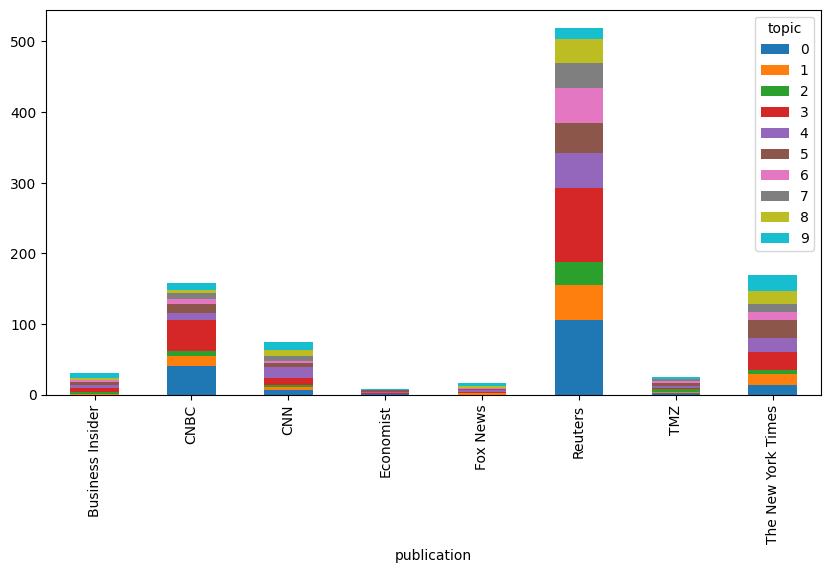

In [390]:
#show me a distribution over articles per publication for each topic
newslimited_cleaned.groupby(['publication', 'topic']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))


# Next steps

lets see

1. Topic modelling for all publications as they are currently
2. Decide on best / biggest topic across most publications
3. Pick articles related to topic for further project
-> further reduces amount of articles